## Machine Learning Exercise 1.

Team10. 장용철, 이현영, 권준오

In [4]:
import numpy as np

%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score

In [5]:
# Import IRIS dataset
iris = datasets.load_iris()

### task1: very simple data analysis
* 아래에 슬라이드에 제시된 scatter plot를 구현하세요

### task2: bias-variance tradeoff
 * 아래 코드의 n_neighbor를 수정했을 때의 변화를 나타내고 tradeoff 관점에서 기술하세요.

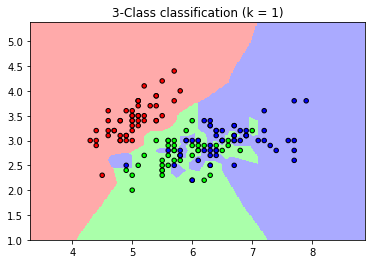

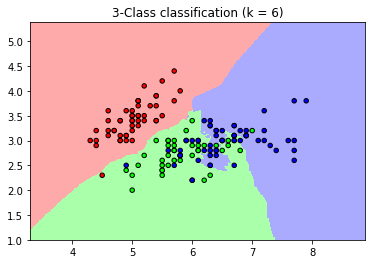

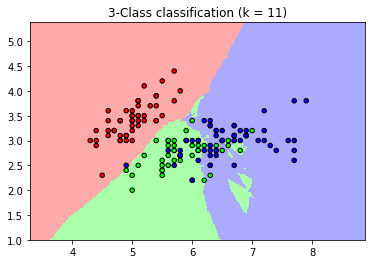

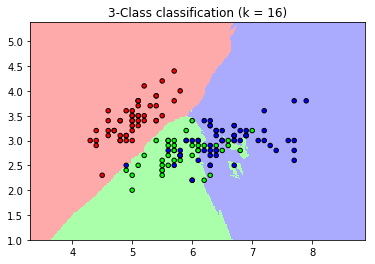

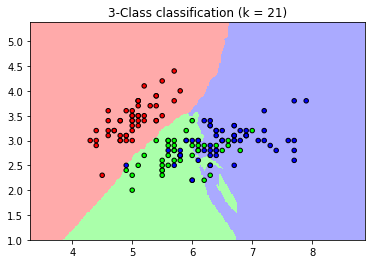

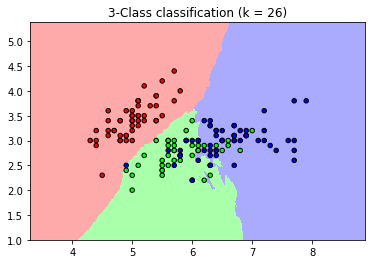

In [125]:
def knn(n):
    n_neighbors = n

    # we only take the first two features. We could avoid this ugly
    # slicing by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))

    plt.show()

    
for i in range(1,31,5):
    knn(i)

k가 감소할수록 이웃을 구성하는 집단의 수가 적으므로
classification이 overfitting 되어 high bias & low variance가 된다.

k가 증가할수록 이웃을 구성하는 집단의 수가 커지므로
classification이 underfitting 되어 high variance & low bias가 된다.

### task 3: training-test set split
* 슬라이드에 제시한 그림을 구현하세요

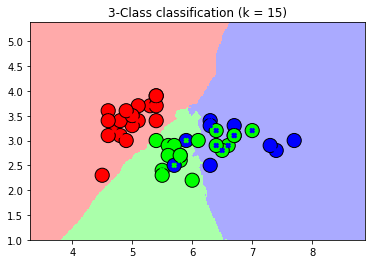

In [120]:
from sklearn.model_selection import train_test_split

n_neighbors = 15

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=200)

y_prod = clf.predict(x_test)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_prod, cmap=cmap_bold, s=20, marker='X')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()


### task 4: overfitting
 * 슬라이드에서 제시한 plot를 구현하고 이 현상을 설명하세요

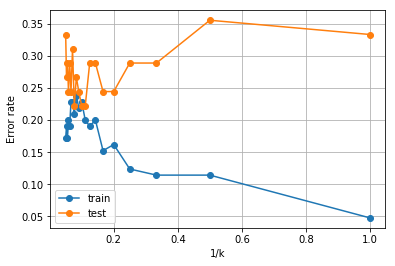

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train_error=[]
test_error=[]
x = []

for k in range(1,21,1):    
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(x_train, y_train)
    x.append(1/k)
    train_error.append(1- clf.score(x_train, y_train))
    test_error.append(1- clf.score(x_test, y_test))

plt.figure()

train, = plt.plot(x,train_error, linestyle='-', marker='o', label='train')
test, = plt.plot(x,test_error, linestyle='-', marker='o', label='test')
plt.legend(handles=[train, test])
plt.grid()
plt.xlabel('1/k')
plt.ylabel('Error rate')


plt.plot()
plt.show()

k 값이 작아지면 각 Point에 가깝게 fitting 되므로 모델 복잡도가 증가하여 overfiting이 되고
모델이 복잡해질수록 Train error는 감소되게 된다.

모델이 복잡할 수록 현재 Train Data를 잘 설명하게 되나,Test Data는 잘 설명하지 못해 Test Data의 error는 증가하게 된다.

k 값이 커지면 여러 Point를 참고한 값으로 smooth하게 fitting 되므로, 모델의 복잡도가 감소하게 된다.
이 경우 Train error는 증가하나, Test error는 감소한다.

최적의 적절한 k값을 찾아야 한다.